Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.4+ MB
None
Missing Values:


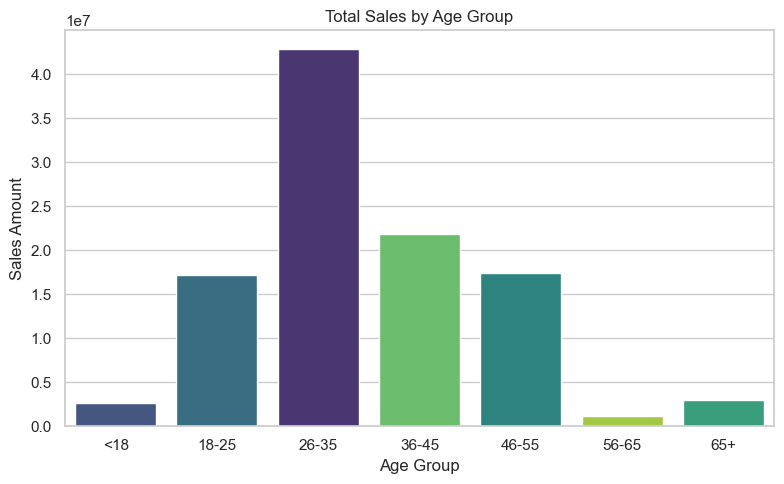

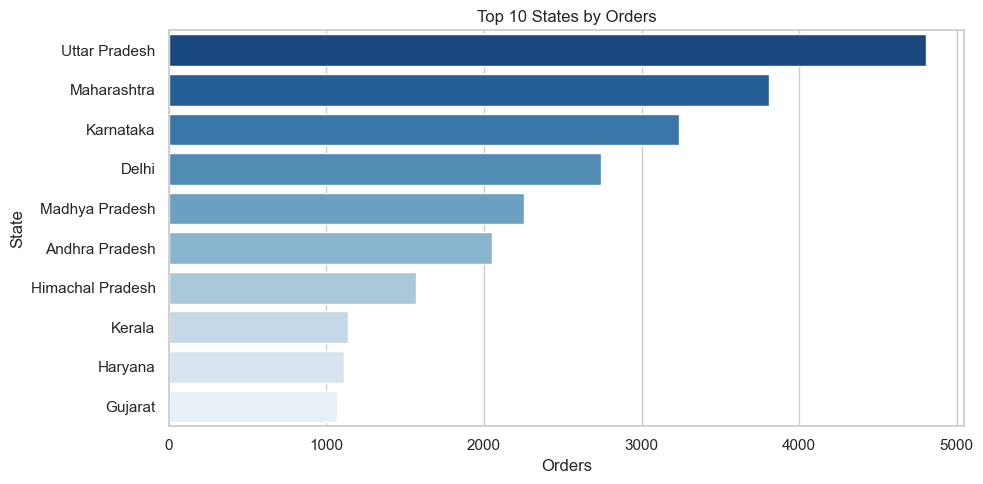

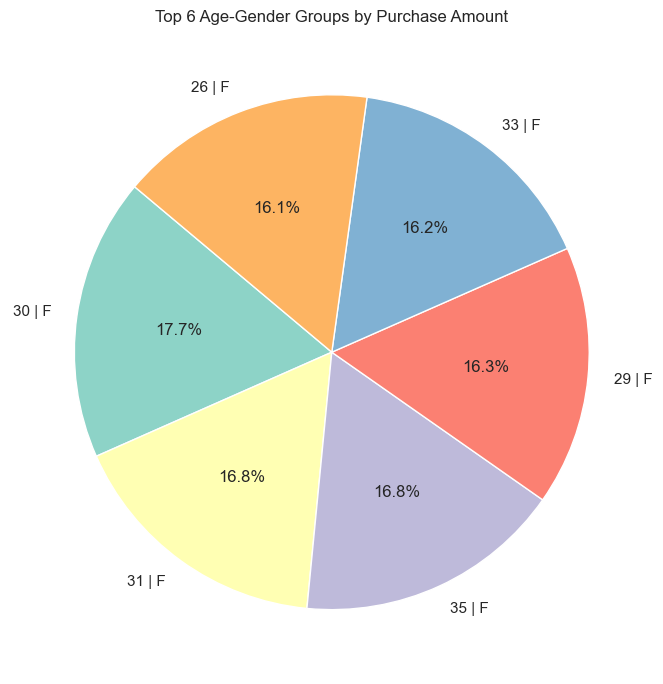

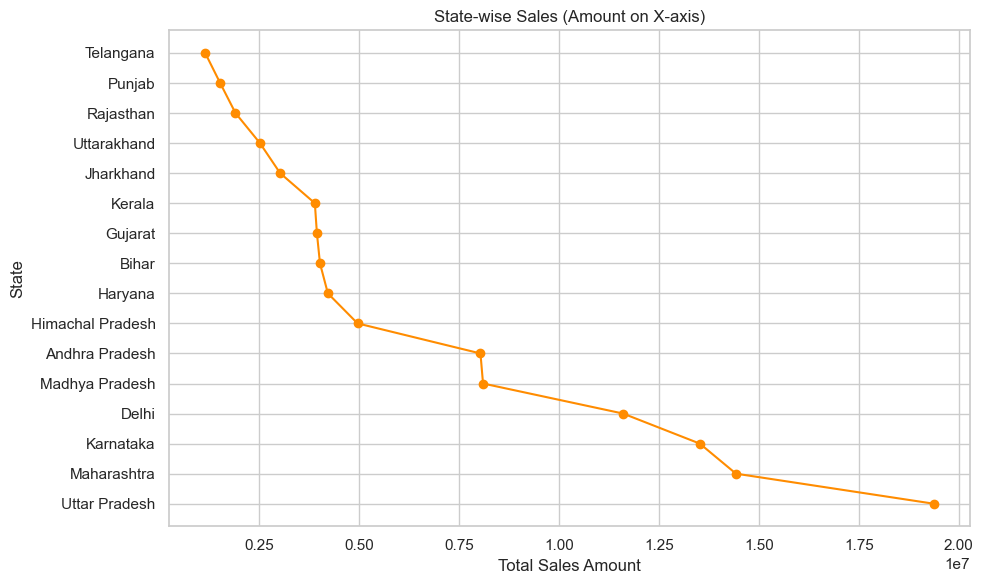

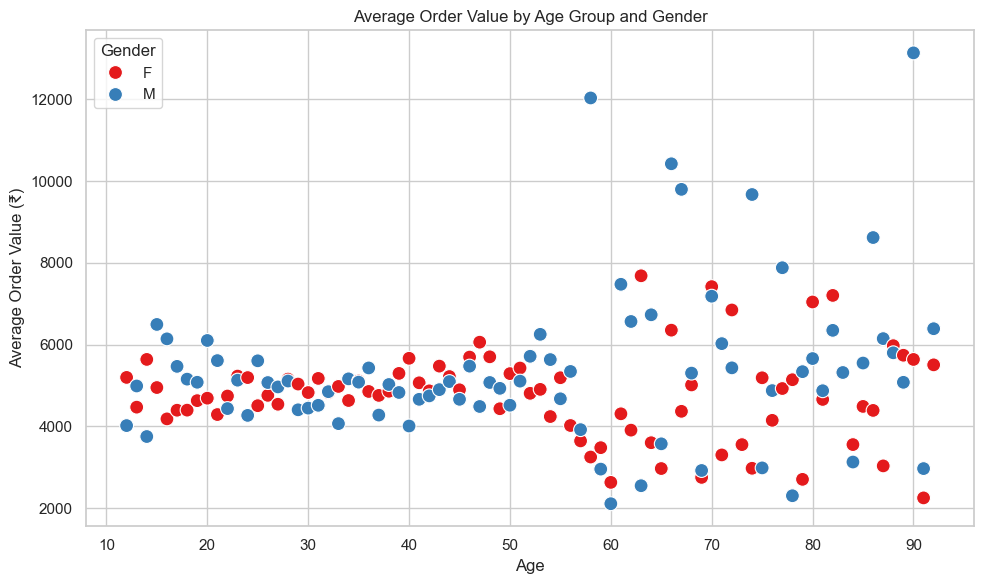

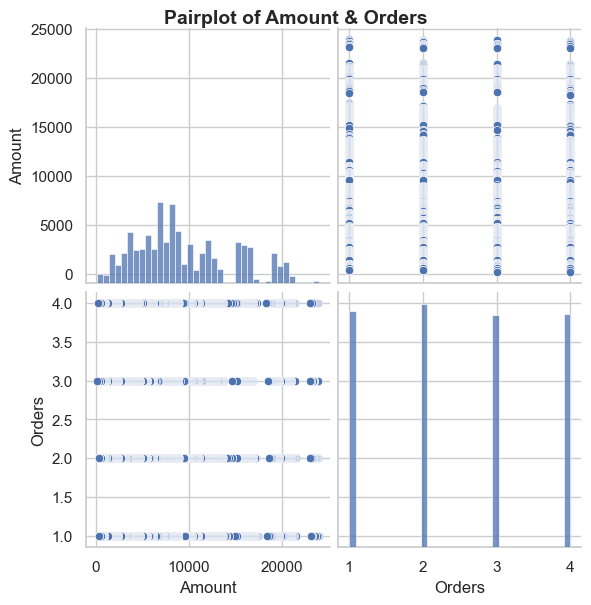

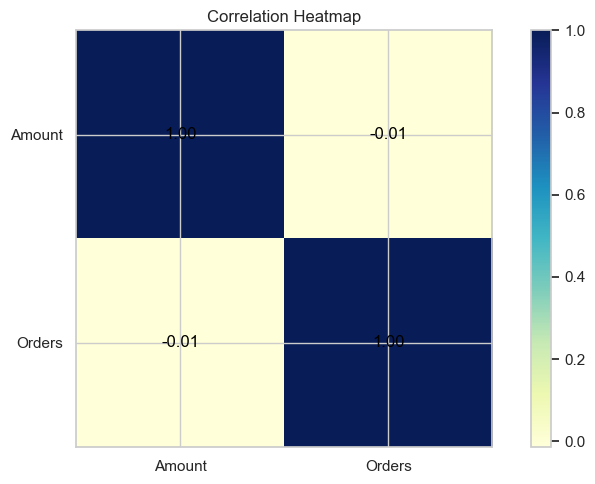

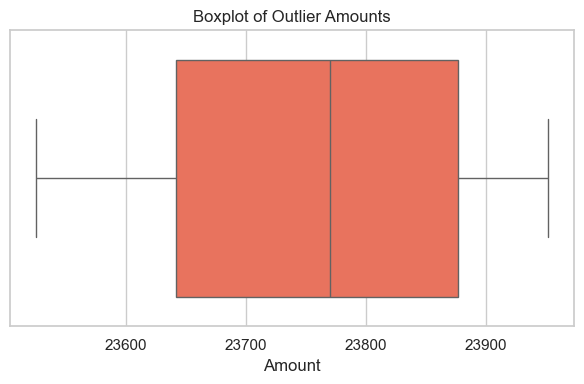

In [1]:
# -------------------------------
# 1. Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

sns.set(style='whitegrid')  # Set seaborn theme

# -------------------------------
# 2. Load and Clean Dataset
# -------------------------------
def load_and_clean_data(filepath):
    df = pd.read_csv(filepath, encoding='latin1')  # Load CSV file with Latin-1 encoding
    df.columns = df.columns.str.strip()  # Remove leading/trailing spaces in column names
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # Convert 'Amount' to numeric, invalid values set to NaN
    df['Orders'] = pd.to_numeric(df['Orders'], errors='coerce')  # Convert 'Orders' to numeric, invalid values set to NaN
    df.dropna(subset=['Amount', 'Orders'], inplace=True)  # Drop rows where 'Amount' or 'Orders' are NaN
    return df

# Load the dataset (update the file path as per your actual file)
df = load_and_clean_data(r"C:\Users\dheeraj\Downloads\Diwali Sales Data (1).csv")

# -------------------------------
# 3. Dataset Overview
# -------------------------------
def dataset_overview(df):
    print("Dataset Info:")
    print(df.info())
    print("Missing Values:")
    print(df.isnull().sum())
    print("Summary Statistics:")
    print(df.describe())

# Display dataset overview
dataset_overview(df)

# -------------------------------
# 4. Objective Analysis
# -------------------------------

# Convert Age to numeric and create Age Group manually
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert 'Age' to numeric, invalid values set to NaN

def get_age_group(age):
    if age <= 17:
        return '<18'
    elif age <= 25:
        return '18-25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-45'
    elif age <= 55:
        return '46-55'
    elif age <= 65:
        return '56-65'
    else:
        return '65+'

df['Age_Group'] = df['Age'].apply(get_age_group)  # Apply function to create 'Age_Group'

# Total Sales by Age Group
def plot_sales_by_age(df):
    age_order = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Age_Group', y='Amount', data=df, estimator=sum, order=age_order, hue='Age_Group', palette='viridis', legend=False, errorbar=None)
    plt.title('Total Sales by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Sales Amount')
    plt.tight_layout()
    plt.show()

plot_sales_by_age(df)

# Top 10 States by Orders
def plot_top_states_by_orders(df):
    top_states = df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10).reset_index()
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Orders', y='State', data=top_states, hue='State', palette='Blues_r', legend=False)
    plt.title('Top 10 States by Orders')
    plt.xlabel('Orders')
    plt.ylabel('State')
    plt.tight_layout()
    plt.show()

plot_top_states_by_orders(df)

# Top Age-Gender Groups by Purchase Amount (Pie Chart)
def plot_simple_age_gender_pie(df):
    df['Age_Gender'] = df['Age'].astype(str) + ' | ' + df['Gender'].astype(str)
    age_gender_sales = df.groupby('Age_Gender')['Amount'].sum().sort_values(ascending=False)
    top6 = age_gender_sales.head(6)
    colors = sns.color_palette('Set3')
    plt.figure(figsize=(7, 7))
    plt.pie(top6.values, labels=top6.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('Top 6 Age-Gender Groups by Purchase Amount')
    plt.tight_layout()
    plt.show()

plot_simple_age_gender_pie(df)

# Statewise Sales (Line Plot)
def plot_statewise_sales_line(df):
    state_sales = df.groupby('State')['Amount'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    plt.plot(state_sales.values, state_sales.index, marker='o', color='darkorange')
    plt.title('State-wise Sales (Amount on X-axis)')
    plt.xlabel('Total Sales Amount')
    plt.ylabel('State')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_statewise_sales_line(df)

# -------------------------------
# 5. Relationship & Innovation
# -------------------------------

# Average Order Value by Age and Gender
def plot_avg_order_value(df):
    df['Average_Order_Value'] = df['Amount'] / df['Orders']
    df.dropna(subset=['Age', 'Gender', 'Average_Order_Value'], inplace=True)
    df['Age'] = df['Age'].astype(str).str.strip()
    df['Gender'] = df['Gender'].astype(str).str.strip()
    grouped = df.groupby(['Age', 'Gender'])['Average_Order_Value'].mean().reset_index()
    grouped['Age'] = grouped['Age'].astype(int)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=grouped, x='Age', y='Average_Order_Value', hue='Gender', s=100, palette='Set1')
    plt.title('Average Order Value by Age Group and Gender')
    plt.xlabel('Age')
    plt.ylabel('Average Order Value (₹)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_avg_order_value(df)

# Pairplot of Amount & Orders
def plot_pairplot(df):
    sns.set_style('whitegrid')
    pair = sns.pairplot(df[['Amount', 'Orders']], height=3)
    pair.fig.suptitle('Pairplot of Amount & Orders', fontsize=14, weight='bold', y=1.0)
    plt.show()

plot_pairplot(df)

# -------------------------------
# 6. Correlation Heatmap
# -------------------------------
def plot_heatmap(df):
    plt.figure(figsize=(8, 5))
    corr = df[['Amount', 'Orders']].corr()
    plt.imshow(corr, cmap='YlGnBu', interpolation='none')
    plt.colorbar()
    plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns)
    plt.yticks(ticks=np.arange(len(corr.columns)), labels=corr.columns)

    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

plot_heatmap(df)

# -------------------------------
# 7. Outlier Boxplot
# -------------------------------
def plot_outliers_boxplot(df):
    q1 = df['Amount'].quantile(0.25)
    q3 = df['Amount'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=outliers['Amount'], color='tomato')
    plt.title('Boxplot of Outlier Amounts')
    plt.xlabel('Amount')
    plt.tight_layout()
    plt.show()

plot_outliers_boxplot(df)

# End of Analysis
